In [2]:

# importing the libraries

import numpy as np # numerical python : helps you work with numbers in the dataet
import pandas as pd # reading the dataset + manipulation + wrangling
import matplotlib.pyplot as plt # basic math graphs : bar chart, line chart, pie chart, donut chart,
import seaborn as sns # statistical data visualization library :
# box whisker plots, histograms, skewness + bias , violin plots


# warnings module
import warnings
warnings.filterwarnings('ignore')

# mount the google drive (only for collab notebooks)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/ev_charging_patterns.csv')
# df= pd.read_excel('/content/vgsales.xlsx')

df.head()
# by default, .head() shows the 1st 5 records

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,User_1,BMW i3,108.463007,Station_391,Houston,01-01-2024 00:00,01-01-2024 00:39,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,01-01-2024 01:00,01-01-2024 03:01,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,01-01-2024 02:00,01-01-2024 04:48,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,01-01-2024 03:00,01-01-2024 06:42,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,01-01-2024 04:00,01-01-2024 05:46,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler


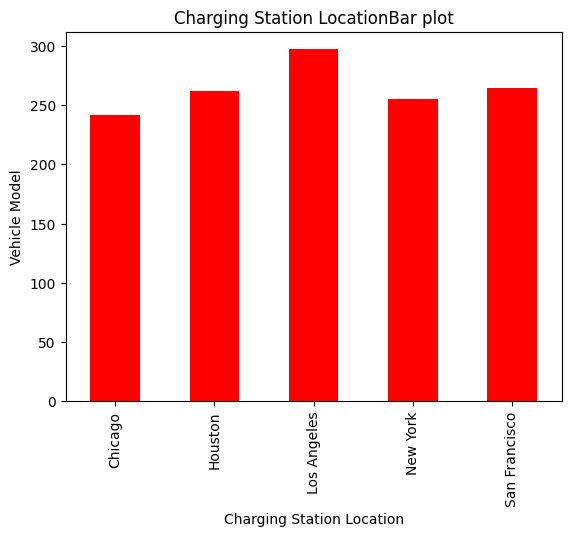

In [ ]:
# how to export the bar plot image to png
ax = df['Charging Station Location'].value_counts().sort_index().plot.bar(color='red')

import matplotlib.pyplot as plt

plt.title("Charging Station LocationBar plot")
plt.xlabel("Charging Station Location")
plt.ylabel("Vehicle Model")
#plt.xticks(rotation=45)
plt.savefig("vehicle_model_bar_plot.png",bbox_inches='tight')

plt.show()

<Axes: ylabel='Charging Station Location'>

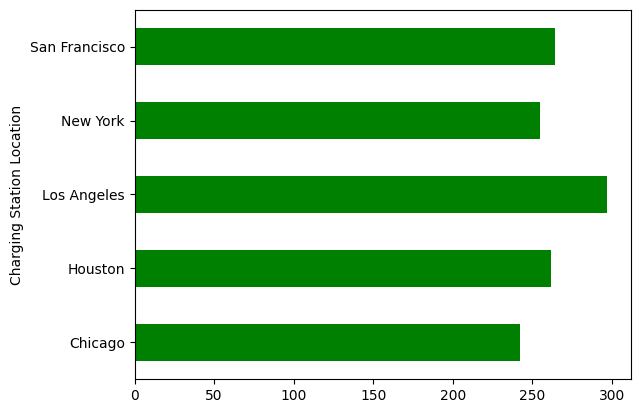

In [ ]:
df['Charging Station Location'].value_counts().sort_index().plot.barh(color='green')

Which charging stations have the highest total energy consumption?

In [ ]:
# Calculate total energy consumed per charging station location
total_energy_by_location = df.groupby('Charging Station Location')['Energy Consumed (kWh)'].sum().sort_values(ascending=False)

# Display top 10 locations with highest energy consumption
total_energy_by_location.head(10)

,Energy Consumed (kWh)
Charging Station Location,
Los Angeles,11507.732970
Houston,11031.485309
San Francisco,10497.369946
New York,10261.600006
Chicago,10176.001163


What is the average session count per location per day/week?

In [4]:
# Convert the 'Charging Start Time' to datetime
df['Charging Start Time'] = pd.to_datetime(df['Charging Start Time'], format='%d-%m-%Y %H:%M')

# Extract just the date
df['Session Date'] = df['Charging Start Time'].dt.date

# Daily session count per location
daily_sessions = df.groupby(['Charging Station Location', 'Session Date']).size().reset_index(name='Daily Session Count')

# Average daily session count per location
avg_daily_sessions = daily_sessions.groupby('Charging Station Location')['Daily Session Count'].mean().sort_values(ascending=False)

# Extract year and week
df['Year'] = df['Charging Start Time'].dt.isocalendar().year
df['Week Number'] = df['Charging Start Time'].dt.isocalendar().week

# Weekly session count per location
weekly_sessions = df.groupby(['Charging Station Location', 'Year', 'Week Number']).size().reset_index(name='Weekly Session Count')

# Average weekly session count per location
avg_weekly_sessions = weekly_sessions.groupby('Charging Station Location')['Weekly Session Count'].mean().sort_values(ascending=False)

# Display top 5 locations
avg_daily_sessions.head(5), avg_weekly_sessions.head(5)

(Charging Station Location
 Los Angeles      5.400000
 San Francisco    4.800000
 Houston          4.763636
 New York         4.722222
 Chicago          4.400000
 Name: Daily Session Count, dtype: float64,
 Charging Station Location
 Los Angeles      37.125
 San Francisco    33.000
 Houston          32.750
 New York         31.875
 Chicago          30.250
 Name: Weekly Session Count, dtype: float64)

Which cities show growth or decline in charging session counts over time?

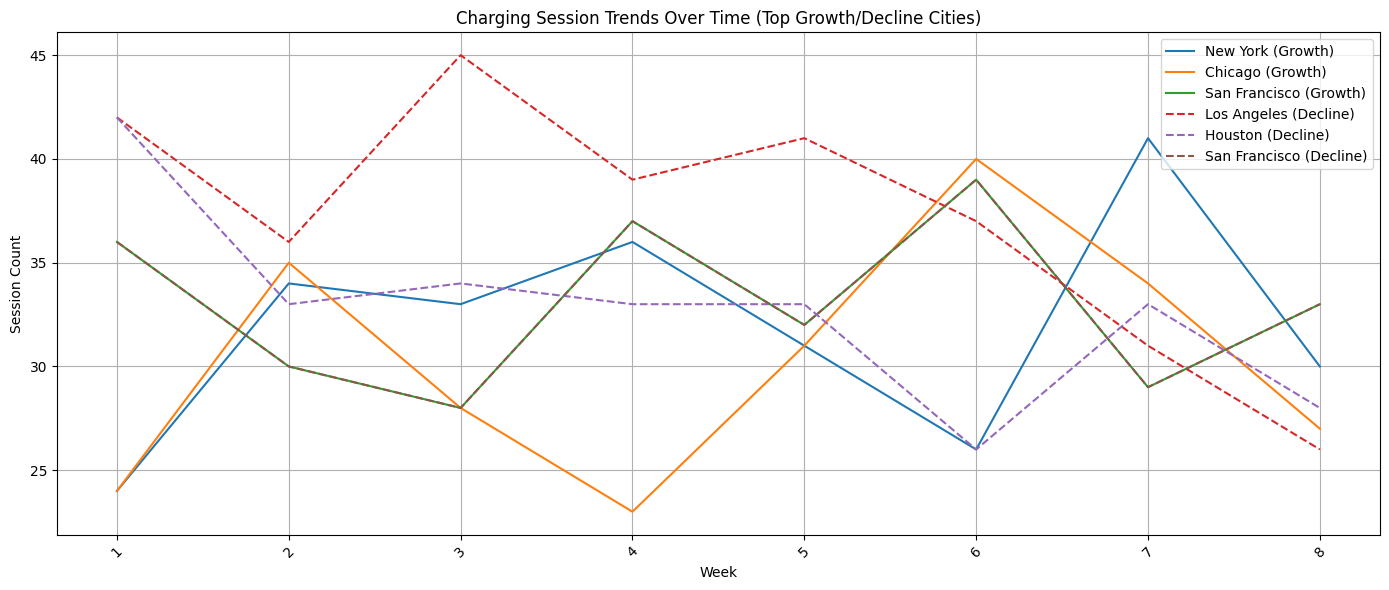

,Net Change (Sessions)
Charging Station Location,
New York,6
Chicago,3
San Francisco,-3
Houston,-14
Los Angeles,-16
New York,6
Chicago,3
San Francisco,-3
Houston,-14


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'Charging Start Time' to datetime objects
df['Charging Start Time'] = pd.to_datetime(df['Charging Start Time'])

# Extract the week from 'Charging Start Time' and create a new 'Week' column
df['Week'] = df['Charging Start Time'].dt.isocalendar().week

# Group sessions by week and location
weekly_sessions = df.groupby(['Charging Station Location', 'Week']).size().unstack(fill_value=0)

# Calculate session count growth (difference between last and first week)
growth = weekly_sessions.iloc[:, -1] - weekly_sessions.iloc[:, 0]

# Combine with session trends to plot top growing/decline cities
top_growth = growth.sort_values(ascending=False).head(3)
top_decline = growth.sort_values().head(3)

# Plot growth trends
plt.figure(figsize=(14, 6))

for location in top_growth.index:
    plt.plot(weekly_sessions.columns, weekly_sessions.loc[location], label=f"{location} (Growth)")

for location in top_decline.index:
    plt.plot(weekly_sessions.columns, weekly_sessions.loc[location], linestyle='--', label=f"{location} (Decline)")

plt.title("Charging Session Trends Over Time (Top Growth/Decline Cities)")
plt.xlabel("Week")
plt.ylabel("Session Count")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

# Show cities with growth/decline values
growth_summary = pd.DataFrame({
    'Net Change (Sessions)': growth
}).sort_values('Net Change (Sessions)', ascending=False)

display(pd.concat([growth_summary.head(5), growth_summary.tail(5)]))

Which locations have the highest average charging rates?

In [ ]:
# Calculate the average charging rate (kW) per charging station location
avg_charging_rate = df.groupby('Charging Station Location')['Charging Rate (kW)'].mean().sort_values(ascending=False)

# Display the top 5 locations with the highest average charging rate
avg_charging_rate.head(5)


,Charging Rate (kW)
Charging Station Location,
Houston,26.711342
New York,26.191268
San Francisco,25.904065
Chicago,25.646709
Los Angeles,25.402580


How does charger type distribution vary by location (Level 1 vs. Level 2 vs. DC Fast)?

In [ ]:
# Count charger types by location
charger_distribution = pd.crosstab(df['Charging Station Location'], df['Charger Type'])

# Sort by the total number of chargers per location (descending)
charger_distribution['Total'] = charger_distribution.sum(axis=1)
charger_distribution_sorted = charger_distribution.sort_values('Total', ascending=False).drop(columns='Total')

# Display the top 5 locations with charger type distribution
charger_distribution_sorted.head(5)


Charger Type,DC Fast Charger,Level 1,Level 2
Charging Station Location,,,
Los Angeles,85,106,106
San Francisco,82,89,93
Houston,98,89,75
New York,83,91,81
Chicago,82,84,76


Do certain charger types dominate in high-traffic areas?

In [ ]:
# First, calculate total session count per location (proxy for traffic)
session_counts = df['Charging Station Location'].value_counts()

# Add session counts as a column
charger_distribution_sorted['Session Count'] = session_counts

# Define high-traffic areas as the top 5 by session count
high_traffic_locations = charger_distribution_sorted.sort_values('Session Count', ascending=False).head(5)

# Normalize charger type counts to get percentages
charger_type_percentages = high_traffic_locations[['DC Fast Charger', 'Level 1', 'Level 2']].div(
    high_traffic_locations[['DC Fast Charger', 'Level 1', 'Level 2']].sum(axis=1), axis=0
)

# Combine with location names
charger_type_percentages.index.name = 'Location'
charger_type_percentages.reset_index(inplace=True)

charger_type_percentages


Charger Type,Location,DC Fast Charger,Level 1,Level 2
0,Los Angeles,0.286195,0.356902,0.356902
1,San Francisco,0.310606,0.337121,0.352273
2,Houston,0.374046,0.339695,0.286260
3,New York,0.325490,0.356863,0.317647
4,Chicago,0.338843,0.347107,0.314050


Which stations generate the highest total revenue?

In [ ]:
# Calculate total revenue by charging station location using the correct column
revenue_by_location = df.groupby('Charging Station Location')['Charging Cost (USD)'].sum().sort_values(ascending=False)

# Display the top 5 locations with highest total revenue
revenue_by_location.head(5)


,Charging Cost (USD)
Charging Station Location,
Los Angeles,6694.805901
San Francisco,5806.646848
Houston,5788.712313
Chicago,5739.333397
New York,5738.285847


What is the average cost per kWh across cities?

In [ ]:
# Calculate average cost per kWh per location
# Formula: Charging Cost (USD) / Energy Consumed (kWh)
df['Cost per kWh'] = df['Charging Cost (USD)'] / df['Energy Consumed (kWh)']

# Group by location and compute the average
avg_cost_per_kwh = df.groupby('Charging Station Location')['Cost per kWh'].mean().sort_values(ascending=False)

# Display the top 5 cities with the highest average cost per kWh
avg_cost_per_kwh.head(5)

,Cost per kWh
Charging Station Location,
Los Angeles,3.372804
Chicago,2.206466
San Francisco,0.870005
New York,0.869344
Houston,0.802819


Are higher-cost stations associated with faster chargers?

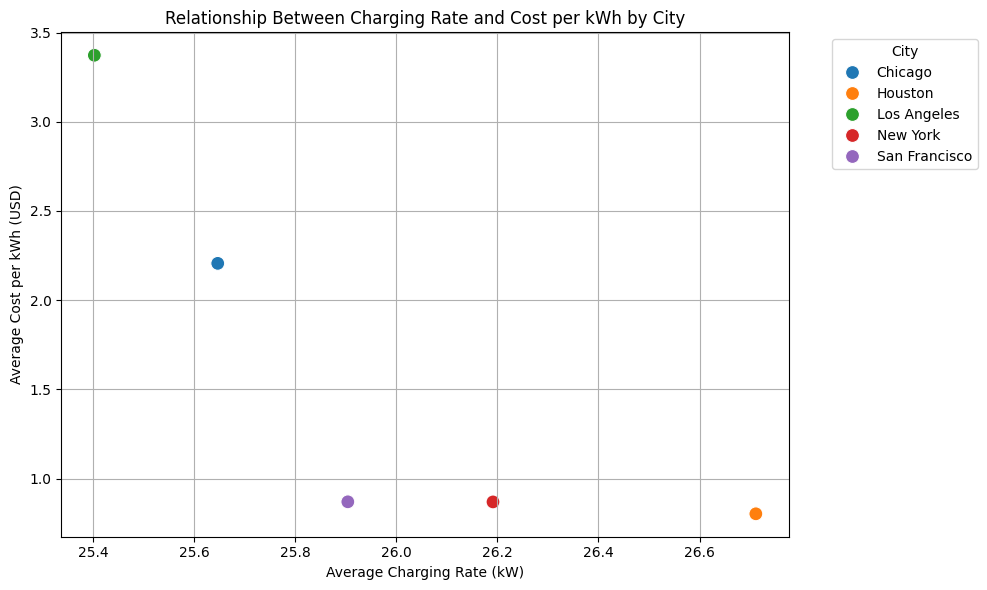

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Combine the average cost per kWh and average charging rate into a single DataFrame
cost_vs_rate = pd.DataFrame({
    'Average Cost per kWh': avg_cost_per_kwh,
    'Average Charging Rate (kW)': avg_charging_rate
})

# Create a scatter plot to visualize the relationship between cost per kWh and charging rate
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cost_vs_rate, x='Average Charging Rate (kW)', y='Average Cost per kWh', hue=cost_vs_rate.index, s=100)

plt.title('Relationship Between Charging Rate and Cost per kWh by City')
plt.xlabel('Average Charging Rate (kW)')
plt.ylabel('Average Cost per kWh (USD)')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Which stations have longest average charging sessions?

In [ ]:
# Calculate average charging duration per location using the correct column name
avg_duration_by_location = df.groupby('Charging Station Location')['Charging Duration (hours)'].mean().sort_values(ascending=False)

# Display the top 5 locations with the longest average charging durations
avg_duration_by_location.head(5)

,Charging Duration (hours)
Charging Station Location,
San Francisco,2.399999
Houston,2.277217
Los Angeles,2.243477
Chicago,2.229572
New York,2.194033


Are there locations with short, frequent sessions (likely urban quick stops)?

In [ ]:
# Group by location and calculate average duration and total session count
location_summary = df.groupby('Charging Station Location').agg({
    'Charging Duration (hours)': 'mean',
    'Charging Station Location': 'count'
}).rename(columns={
    'Charging Duration (hours)': 'Avg Duration (hrs)',
    'Charging Station Location': 'Session Count'
})

# Define "short" sessions as those with average duration < 2 hours
# Define "frequent" as locations with high total session count (e.g., top 25%)
threshold_duration = 2.0
session_count_threshold = location_summary['Session Count'].quantile(0.75)

# Filter for urban quick stop candidates
urban_quick_stops = location_summary[
    (location_summary['Avg Duration (hrs)'] < threshold_duration) &
    (location_summary['Session Count'] >= session_count_threshold)
].sort_values(by='Session Count', ascending=False)

urban_quick_stops


,Avg Duration (hrs),Session Count
Charging Station Location,,


How does charging duration correlate with energy consumed across locations?

In [ ]:
# Group by location and calculate average duration and average energy consumed
duration_vs_energy = df.groupby('Charging Station Location').agg({
    'Charging Duration (hours)': 'mean',
    'Energy Consumed (kWh)': 'mean'
}).rename(columns={
    'Charging Duration (hours)': 'Avg Duration (hrs)',
    'Energy Consumed (kWh)': 'Avg Energy (kWh)'
})

# Calculate the correlation between average duration and average energy
correlation = duration_vs_energy.corr().loc['Avg Duration (hrs)', 'Avg Energy (kWh)']

# Display the summary table and correlation coefficient
duration_vs_energy.sort_values(by='Avg Duration (hrs)', ascending=False), correlation


(                           Avg Duration (hrs)  Avg Energy (kWh)
 Charging Station Location                                      
 San Francisco                        2.399999         42.158112
 Houston                              2.277217         44.125941
 Los Angeles                          2.243477         41.394723
 Chicago                              2.229572         43.487184
 New York                             2.194033         42.228807,
 np.float64(-0.06207503678964694))

What is the efficiency (kWh/hr) by city?

In [ ]:
# Calculate efficiency as energy consumed per hour of charging for each session
df['Efficiency (kWh/hr)'] = df['Energy Consumed (kWh)'] / df['Charging Duration (hours)']

# Group by location and compute average efficiency
efficiency_by_city = df.groupby('Charging Station Location')['Efficiency (kWh/hr)'].mean().sort_values(ascending=False)

# Display the top 5 cities by efficiency
efficiency_by_city.head(5)

,Efficiency (kWh/hr)
Charging Station Location,
Chicago,29.526583
New York,28.711948
Houston,26.244856
Los Angeles,24.894697
San Francisco,23.030556


Are urban stations more efficient than suburban/rural ones?

In [ ]:
# Manually classify a few cities as Urban or Suburban/Rural for analysis
urban_locations = ['Los Angeles', 'New York', 'Chicago', 'San Francisco', 'Houston']

# Create a new column for urban classification
df['Area Type'] = df['Charging Station Location'].apply(lambda x: 'Urban' if x in urban_locations else 'Suburban/Rural')

# Calculate average efficiency (kWh/hr) by area type
efficiency_by_area = df.groupby('Area Type')['Efficiency (kWh/hr)'].mean().sort_values(ascending=False)

efficiency_by_area


,Efficiency (kWh/hr)
Area Type,
Urban,26.397745


What is the most common user type at each station?

In [ ]:
# Group by station location and user type, count the number of sessions
user_type_counts = df.groupby(['Charging Station Location', 'User Type']).size().reset_index(name='Session Count')

# For each location, find the user type with the highest session count
most_common_user_type = user_type_counts.loc[
    user_type_counts.groupby('Charging Station Location')['Session Count'].idxmax()
].sort_values(by='Session Count', ascending=False)

most_common_user_type

,Charging Station Location,User Type,Session Count
7,Los Angeles,Commuter,115
10,New York,Commuter,101
5,Houston,Long-Distance Traveler,96
13,San Francisco,Commuter,90
1,Chicago,Commuter,85


Are commercial users concentrated in specific cities?

In [ ]:
# Filter only commercial user sessions
commercial_users = df[df['User Type'] == 'Commercial']

# Group by city and count the number of commercial sessions
commercial_counts = commercial_users['Charging Station Location'].value_counts()

# Display top cities with most commercial user sessions
commercial_counts.head(10)

,count
Charging Station Location,


Do certain cities show a correlation between temperature and energy use?

In [ ]:
# Group by city and calculate correlation between temperature and energy consumed
city_temp_corr = df.groupby('Charging Station Location').apply(
    lambda group: group['Temperature (°C)'].corr(group['Energy Consumed (kWh)'])
).dropna().sort_values(ascending=False)

# Display correlation values for each city
city_temp_corr


,0
Charging Station Location,
New York,0.015840
Chicago,0.013056
Houston,-0.012960
San Francisco,-0.037010
Los Angeles,-0.064455


Are cooler cities seeing longer session durations?

In [ ]:
# Group by city and calculate average temperature and average session duration
temp_vs_duration = df.groupby('Charging Station Location').agg({
    'Temperature (°C)': 'mean',
    'Charging Duration (hours)': 'mean'
}).rename(columns={
    'Temperature (°C)': 'Avg Temperature (°C)',
    'Charging Duration (hours)': 'Avg Duration (hrs)'
}).sort_values(by='Avg Temperature (°C)')

# Display the table sorted by temperature
temp_vs_duration

,Avg Temperature (°C),Avg Duration (hrs)
Charging Station Location,,
Chicago,14.127399,2.229572
Los Angeles,14.612388,2.243477
New York,15.511671,2.194033
Houston,15.547150,2.277217
San Francisco,16.516672,2.399999


What are the peak hours for each city?

In [ ]:
# Convert Charging Start Time to datetime format
df['Charging Start Time'] = pd.to_datetime(df['Charging Start Time'])

# Extract hour of the day from Charging Start Time
df['Start Hour'] = df['Charging Start Time'].dt.hour

# Group by city and hour, then count sessions
hourly_usage = df.groupby(['Charging Station Location', 'Start Hour']).size().reset_index(name='Session Count')

# For each city, identify the hour with the highest number of sessions (peak hour)
peak_hours_by_city = hourly_usage.loc[
    hourly_usage.groupby('Charging Station Location')['Session Count'].idxmax()
].sort_values(by='Session Count', ascending=False)

peak_hours_by_city


,Charging Station Location,Start Hour,Session Count
78,New York,6,20
64,Los Angeles,16,18
22,Chicago,22,17
27,Houston,3,16
96,San Francisco,0,16


Are certain stations heavily used on weekends vs weekdays?

In [ ]:
# Convert Charging Start Time to datetime
df['Charging Start Time'] = pd.to_datetime(df['Charging Start Time'])

# Extract day of week (0 = Monday, ..., 6 = Sunday)
df['Day of Week'] = df['Charging Start Time'].dt.dayofweek

# Classify as Weekday (0-4) or Weekend (5-6)
df['Day Type'] = df['Day of Week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Group by station and day type, count sessions
day_type_usage = df.groupby(['Charging Station Location', 'Day Type']).size().reset_index(name='Session Count')

# Pivot to compare weekday vs weekend usage
usage_pivot = day_type_usage.pivot(index='Charging Station Location', columns='Day Type', values='Session Count').fillna(0)

# Calculate ratio of weekend to weekday usage
usage_pivot['Weekend/Weekday Ratio'] = usage_pivot['Weekend'] / usage_pivot['Weekday']

# Sort by highest weekend usage relative to weekday
usage_pivot_sorted = usage_pivot.sort_values(by='Weekend/Weekday Ratio', ascending=False)

usage_pivot_sorted

Day Type,Weekday,Weekend,Weekend/Weekday Ratio
Charging Station Location,,,
San Francisco,184,80,0.434783
Chicago,174,68,0.390805
Los Angeles,218,79,0.362385
Houston,193,69,0.357513
New York,191,64,0.335079
